In [6]:
# Importing necessary libraries and modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Load data
countries = pd.read_csv("./data/village_savings/Countries.csv")
locations = pd.read_csv("./data/village_savings/Locations.csv")
regions = pd.read_csv("./data/village_savings/Regions.csv")
members = pd.read_csv("./data/village_savings/Members.csv", sep="\t") #tab seperated csv
group_members = pd.read_csv("./data/village_savings/GroupMembers.csv")
groups = pd.read_csv("./data/village_savings/SavingsGroups.csv", sep="\t")


In [8]:
# Join data: Location Name, Region Name, and Country Name
groups = groups.merge(locations, on="LocationId").merge(regions, on="RegionId").merge(countries, on="CountryCode")

In [9]:
groups.head()

,GroupID,GroupName,MaximumMemberCount,LanguageCode,CurrencyCode,LocationId,IsActive,GroupStatusCode,GroupTypeCode,DateCreated,LocationName,RegionId,RegionName,CountryCode,CountryName,PhoneCode,IsKhusaServiceOffered,GMTHours
0,1,Brakus-Borer,20,en-GB,MWK,7,1,A,V,20:09.8,Lilongwe,2,Central,MW,Malawi,265,1,2
1,2,"Bergstrom, Raynor and Gutmann",10,en-GB,MWK,7,1,A,V,31:19.9,Lilongwe,2,Central,MW,Malawi,265,1,2
2,3,Carroll and Sons,8,en-GB,MWK,7,1,E,V,29:02.8,Lilongwe,2,Central,MW,Malawi,265,1,2
3,4,Hoppe-Lueilwitz,10,en-GB,MWK,7,1,E,M,04:19.3,Lilongwe,2,Central,MW,Malawi,265,1,2
4,8,Ward LLC,20,en-GB,MWK,7,1,E,V,05:46.1,Lilongwe,2,Central,MW,Malawi,265,1,2


In [10]:
# Get Member of groups
# groups[groups.GroupStatusCode != 'E']
groups['NumberOfMembers'] = 0
for idx, row in groups.iterrows():
   if row.IsKhusaServiceOffered == 1:
       groups.at[idx, 'NumberOfMembers'] = group_members[lambda x: x.GroupID == row.GroupID]['GroupID'].count()

In [11]:
# Create pivot table using RegionName and CountryName columns.
group_pivot_table = pd.pivot_table(groups[groups.NumberOfMembers > 0], values='NumberOfMembers', index=['CountryName', 'RegionName'], columns=['GroupName'], fill_value=0)

<AxesSubplot:xlabel='GroupName', ylabel='CountryName-RegionName'>

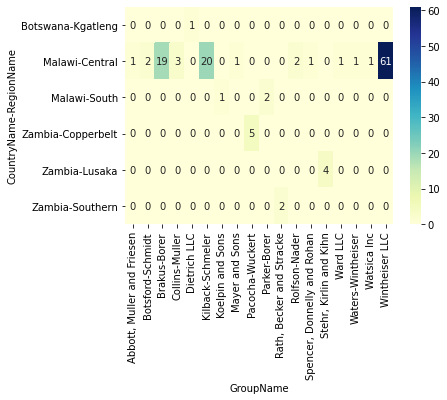

In [12]:
#Question 1. How many groups and members are there currently registered? And what is their geographical coverage? (Country and Region)
sns.heatmap(group_pivot_table, annot=True,  cmap="YlGnBu")

In [13]:
group_members.head()

,MemberGroupID,MemberID,GroupID,IsMainMember,MemberStatusCode,DateCreated
0,1,1,1,1,A,2018-09-24 15:20:09.913
1,2,2,1,1,A,2018-09-24 16:04:22.800
2,3,3,1,1,A,2018-09-24 16:06:16.737
3,4,4,1,1,A,2018-09-24 16:08:06.967
4,5,5,1,1,A,2018-09-24 16:10:23.960


In [14]:
group_members = group_members.merge(members[['MemberID', 'Gender']], on="MemberID").merge(groups[['GroupID', 'GroupName', 'RegionName']], on="GroupID")

In [15]:
group_members.head()

,MemberGroupID,MemberID,GroupID,IsMainMember,MemberStatusCode,DateCreated,Gender,GroupName,RegionName
0,1,1,1,1,A,2018-09-24 15:20:09.913,M,Brakus-Borer,Central
1,2,2,1,1,A,2018-09-24 16:04:22.800,M,Brakus-Borer,Central
2,3,3,1,1,A,2018-09-24 16:06:16.737,M,Brakus-Borer,Central
3,4,4,1,1,A,2018-09-24 16:08:06.967,M,Brakus-Borer,Central
4,5,5,1,1,A,2018-09-24 16:10:23.960,M,Brakus-Borer,Central


<AxesSubplot:ylabel='Density'>

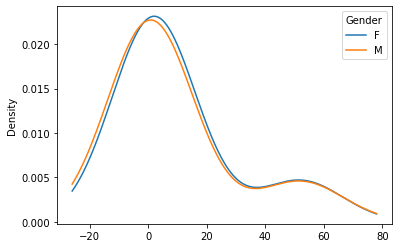

In [33]:
pd.crosstab([group_members.GroupName],group_members.Gender).plot.density()

<AxesSubplot:ylabel='RegionName'>

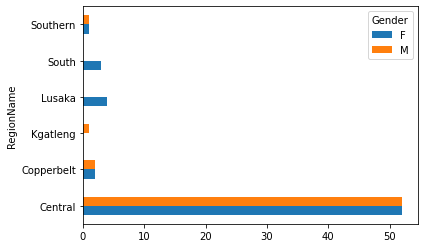

In [17]:
pd.crosstab([group_members.RegionName],group_members['Gender']).plot.barh()
